# Problème de régression : Customer Life Time Value

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [2]:
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/OnlineRetail.xlsx"
df = pd.read_excel(file_name, sheet_name='Online Retail')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# afficher la forme de notre dataframe

df.shape

(541909, 8)

In [4]:
# Supprimer les données dont les quantités (Colonne 'Quantity') inférieures à 0 (éventuellement articles retournés)

df.drop(df[df["Quantity"] < 0].index, inplace=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [5]:
# Supprimer les identifiants client vides (CustomerID)

df["CustomerID"].dropna(inplace=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [6]:
# afficher le data range de la colonne 'InvoiceDate' (Min, Max)

print(f"Début : {df['InvoiceDate'].min()}\n")

print(f"Fin : {df['InvoiceDate'].max()}\n")

Début : 2010-12-01 08:26:00

Fin : 2011-12-09 12:50:00



In [7]:
# Reprenant toutes les transactions intervenues avant le 01 décembre 2011 

df_bis = df[df["InvoiceDate"] < datetime.strptime("01/12/2011", "%d/%m/%Y")]
df_bis

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
516364,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,2011-11-30 17:37:00,1.25,15444.0,United Kingdom
516365,579885,21742,LARGE ROUND WICKER PLATTER,2,2011-11-30 17:37:00,5.95,15444.0,United Kingdom
516366,579885,23084,RABBIT NIGHT LIGHT,6,2011-11-30 17:37:00,2.08,15444.0,United Kingdom
516367,579885,21257,VICTORIAN SEWING BOX MEDIUM,1,2011-11-30 17:37:00,7.95,15444.0,United Kingdom


In [8]:
# Créer une colonne de chiffre d'affaires appelée sales, Sales = Quantity * UnitPrice

df_bis["Sales"] = df["Quantity"] * df["UnitPrice"]
df_bis

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
516364,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,2011-11-30 17:37:00,1.25,15444.0,United Kingdom,5.00
516365,579885,21742,LARGE ROUND WICKER PLATTER,2,2011-11-30 17:37:00,5.95,15444.0,United Kingdom,11.90
516366,579885,23084,RABBIT NIGHT LIGHT,6,2011-11-30 17:37:00,2.08,15444.0,United Kingdom,12.48
516367,579885,21257,VICTORIAN SEWING BOX MEDIUM,1,2011-11-30 17:37:00,7.95,15444.0,United Kingdom,7.95


In [9]:
# Obtenez un ensemble de données récapitulatif appelé 'orders_df' des commandes qui montre les chifres d'affaire 'Sales' et la date de transaction 'InvoiceDate' pour chaque transaction 'InvoiceNo	' de chaque client 'CustomerID'
# Indication : Utiliser la fonction df.groupby().agg()

orders_df = df_bis.groupby(['CustomerID', 'InvoiceNo']).agg({'Sales': 'sum', 'InvoiceDate': 'first'}).reset_index()
orders_df


,CustomerID,InvoiceNo,Sales,InvoiceDate
0,12346.0,541431,77183.60,2011-01-18 10:01:00
1,12347.0,537626,711.79,2010-12-07 14:57:00
2,12347.0,542237,475.39,2011-01-26 14:30:00
3,12347.0,549222,636.25,2011-04-07 10:43:00
4,12347.0,556201,382.52,2011-06-09 13:01:00
...,...,...,...,...
17753,18283.0,578262,313.65,2011-11-23 13:27:00
17754,18283.0,579673,223.61,2011-11-30 12:59:00
17755,18287.0,554065,765.28,2011-05-22 10:39:00
17756,18287.0,570715,1001.32,2011-10-12 10:23:00


In [10]:
# # Afficher les 10 premières lignes de 'orders_df'

orders_df.head(10)

,CustomerID,InvoiceNo,Sales,InvoiceDate
0,12346.0,541431,77183.60,2011-01-18 10:01:00
1,12347.0,537626,711.79,2010-12-07 14:57:00
2,12347.0,542237,475.39,2011-01-26 14:30:00
3,12347.0,549222,636.25,2011-04-07 10:43:00
4,12347.0,556201,382.52,2011-06-09 13:01:00
5,12347.0,562032,584.91,2011-08-02 08:48:00
6,12347.0,573511,1294.32,2011-10-31 12:25:00
7,12348.0,539318,892.80,2010-12-16 19:09:00
8,12348.0,541998,227.44,2011-01-25 10:42:00
9,12348.0,548955,367.00,2011-04-05 10:47:00


In [11]:
# Créer une dataframe appelée "summary_df" contenant le ( min, max, sum, regroupby_mean, groupby_count ) de "sales" et le (min, max, purchase_duration, avg_frequency) de 'InvoiceDate'  
# La sortie souhaitée est indiquée dans le tableau ci-dessous

agg_func = {'Sales': [
        'min', 
        'max', 
        'sum', 
        ('avg', 'mean'), 
        'count'
    ],
    'InvoiceDate' : [
        'min',
        'max',
        ("purchase_duration", lambda x : (x.max() - x.min()).days),
        ("purchase_frequency", lambda x : (x.max() - x.min()).days/x.count())
    ]
}
summary_df = orders_df.groupby(['CustomerID']).agg(agg_func)
summary_df

Sales                                          \
                 min       max       sum           avg count   
CustomerID                                                     
12346.0     77183.60  77183.60  77183.60  77183.600000     1   
12347.0       382.52   1294.32   4085.18    680.863333     6   
12348.0       227.44    892.80   1797.24    449.310000     4   
12349.0      1757.55   1757.55   1757.55   1757.550000     1   
12350.0       334.40    334.40    334.40    334.400000     1   
...              ...       ...       ...           ...   ...   
18280.0       180.60    180.60    180.60    180.600000     1   
18281.0        80.82     80.82     80.82     80.820000     1   
18282.0       100.21    100.21    100.21    100.210000     1   
18283.0         1.95    313.65   1886.88    125.792000    15   
18287.0        70.68   1001.32   1837.28    612.426667     3   

                   InvoiceDate                                        \
                           min                 max purchase_duration   
CustomerID                                                             
12346.0    2011-01-18 10:01:00 2011-01-18 10:01:00                 0   
12347.0    2010-12-07 14:57:00 2011-10-31 12:25:00               327   
12348.0    2010-12-16 19:09:00 2011-09-25 13:13:00               282   
12349.0    2011-11-21 09:51:00 2011-11-21 09:51:00                 0   
12350.0    2011-02-02 16:01:00 2011-02-02 16:01:00                 0   
...                        ...                 ...               ...   
18280.0    2011-03-07 09:52:00 2011-03-07 09:52:00                 0   
18281.0    2011-06-12 10:53:00 2011-06-12 10:53:00                 0   
18282.0    2011-08-05 13:35:00 2011-08-05 13:35:00                 0   
18283.0    2011-01-06 14:14:00 2011-11-30 12:59:00               327   
18287.0    2011-05-22 10:39:00 2011-10-28 09:29:00               158   

                               
           purchase_frequency  
CustomerID                     
12346.0              0.000000  
12347.0             54.500000  
12348.0             70.500000  
12349.0              0.000000  
12350.0              0.000000  
...                       ...  
18280.0              0.000000  
18281.0              0.000000  
18282.0              0.000000  
18283.0             21.800000  
18287.0             52.666667  

[4298 rows x 9 columns]

In [12]:
# Renommer les noms des colonnes de la dataframe "summary_df" en ajoutant la rangée du haut et un '_'
# La sortie souhaitée est indiquée dans le tableau ci-dessous

new_cols = []
for col in summary_df.columns:
    col = col[0] + '_' + col[1]
    new_cols.append(col)

summary_df.columns = new_cols

summary_df

,Sales_min,Sales_max,Sales_sum,Sales_avg,Sales_count,InvoiceDate_min,InvoiceDate_max,InvoiceDate_purchase_duration,InvoiceDate_purchase_frequency
CustomerID,,,,,,,,,
12346.0,77183.60,77183.60,77183.60,77183.600000,1,2011-01-18 10:01:00,2011-01-18 10:01:00,0,0.000000
12347.0,382.52,1294.32,4085.18,680.863333,6,2010-12-07 14:57:00,2011-10-31 12:25:00,327,54.500000
12348.0,227.44,892.80,1797.24,449.310000,4,2010-12-16 19:09:00,2011-09-25 13:13:00,282,70.500000
12349.0,1757.55,1757.55,1757.55,1757.550000,1,2011-11-21 09:51:00,2011-11-21 09:51:00,0,0.000000
12350.0,334.40,334.40,334.40,334.400000,1,2011-02-02 16:01:00,2011-02-02 16:01:00,0,0.000000
...,...,...,...,...,...,...,...,...,...
18280.0,180.60,180.60,180.60,180.600000,1,2011-03-07 09:52:00,2011-03-07 09:52:00,0,0.000000
18281.0,80.82,80.82,80.82,80.820000,1,2011-06-12 10:53:00,2011-06-12 10:53:00,0,0.000000
18282.0,100.21,100.21,100.21,100.210000,1,2011-08-05 13:35:00,2011-08-05 13:35:00,0,0.000000


## Visualisation de données 

In [13]:
# Laisser dans la dataframe 'summary_df' que les données dont le 'invoicedate_purchase_duration' > 0

summary_df = summary_df[summary_df["InvoiceDate_purchase_duration"]>0]
summary_df

,Sales_min,Sales_max,Sales_sum,Sales_avg,Sales_count,InvoiceDate_min,InvoiceDate_max,InvoiceDate_purchase_duration,InvoiceDate_purchase_frequency
CustomerID,,,,,,,,,
12347.0,382.52,1294.32,4085.18,680.863333,6,2010-12-07 14:57:00,2011-10-31 12:25:00,327,54.500000
12348.0,227.44,892.80,1797.24,449.310000,4,2010-12-16 19:09:00,2011-09-25 13:13:00,282,70.500000
12352.0,120.33,840.30,2506.04,313.255000,8,2011-02-16 12:33:00,2011-11-03 14:37:00,260,32.500000
12356.0,58.35,2271.62,2811.43,937.143333,3,2011-01-18 09:50:00,2011-11-17 08:40:00,302,100.666667
12359.0,547.50,2876.85,6372.58,1593.145000,4,2011-01-12 12:43:00,2011-10-13 12:47:00,274,68.500000
...,...,...,...,...,...,...,...,...,...
18270.0,111.95,171.20,283.15,141.575000,2,2011-03-18 12:41:00,2011-11-01 13:57:00,228,114.000000
18272.0,340.72,753.66,2710.70,542.140000,5,2011-04-07 09:35:00,2011-10-25 11:52:00,201,40.200000
18273.0,51.00,102.00,153.00,76.500000,2,2011-03-27 11:22:00,2011-09-05 11:27:00,162,81.000000


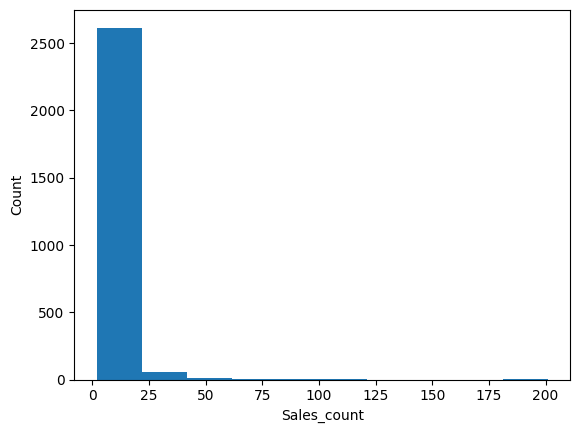

In [14]:
# Afficher l'histogramme de la colonne "sales_count"
# l'axe des abscisses est étiqueté par 'sales_count' et l'axe des ordonnées par 'Count'

plt.hist(summary_df['Sales_count'])
plt.xlabel("Sales_count")
plt.ylabel('Count')
plt.show()

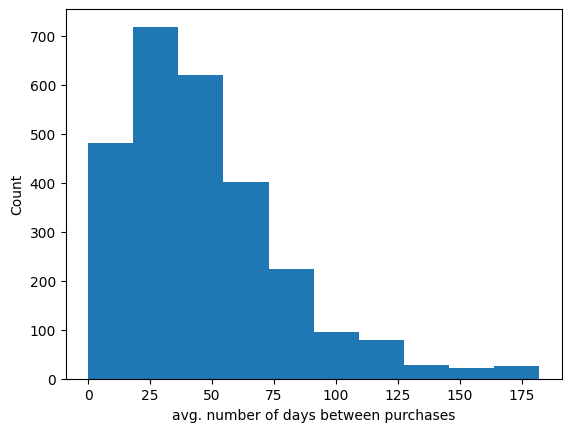

In [15]:
# Afficher l'histogramme de la colonne 'invoicedate_purchase_frequency'
# l'axe des abscisses est étiqueté par 'avg. number of days between purchases' et l'axe des ordonnées par 'Count'

plt.hist(summary_df['InvoiceDate_purchase_frequency'])
plt.xlabel("avg. number of days between purchases")
plt.ylabel('Count')
plt.show()

# Predicting the 3 month Customer Lifetime Value

In [16]:
# Afficher les 6 premières lignes du dataframe 'orders_df' (Créé en début de brief)

orders_df.head(6)

,CustomerID,InvoiceNo,Sales,InvoiceDate
0,12346.0,541431,77183.60,2011-01-18 10:01:00
1,12347.0,537626,711.79,2010-12-07 14:57:00
2,12347.0,542237,475.39,2011-01-26 14:30:00
3,12347.0,549222,636.25,2011-04-07 10:43:00
4,12347.0,556201,382.52,2011-06-09 13:01:00
5,12347.0,562032,584.91,2011-08-02 08:48:00


In [17]:
# L'objectif de cette partie est de créer des statistiques récapitulatives tous les 3 mois pour les ventes des clients, fixer la fréquence '3M' et pensez à utiliser les fonctions .reset_index().groupby et .Grouper 
# Le résultat désiré est affiché au-dessous
# 1. fixer la clv_freq en 3 mois

clv_freq = pd.Grouper(key='InvoiceDate', freq='3M')

# 2. Regroupez par ID client et regroupez toutes les factures pour des cycles de 3 mois. Agréger sur la somme, la moyenne et les comptes

df_3months = orders_df.groupby(['CustomerID', clv_freq]).agg({'Sales': ['sum', 'mean', 'count']}).reset_index()

df_3months.columns = ['CustomerID', 'InvoiceDate', 'sales_sum', 'sales_avg', 'sales_count']
df_3months

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12346.0,2011-03-31,77183.60,77183.600000,1
1,12347.0,2010-12-31,711.79,711.790000,1
2,12347.0,2011-03-31,475.39,475.390000,1
3,12347.0,2011-06-30,1018.77,509.385000,2
4,12347.0,2011-09-30,584.91,584.910000,1
...,...,...,...,...,...
9215,18283.0,2011-06-30,524.68,131.170000,4
9216,18283.0,2011-09-30,278.09,92.696667,3
9217,18283.0,2011-12-31,766.21,153.242000,5
9218,18287.0,2011-06-30,765.28,765.280000,1


In [18]:
# L'objectif de cette partie est de créer une nouvelle colonne appelée 'M' comme réferance sur les mois.
# Le résultat désiré est affiché au-dessous

# Développer les valeurs de M : 'M_4', 'M_5', 'M_3', 'M_2', 'M_1'

# Rajouter la colonne 'M' dans notre datframe par la fonction lampda
Months = {
    '2011-03-31 00:00:00': "M_2",
    '2010-12-31 00:00:00': "M_1",
    '2011-06-30 00:00:00': "M_3",
    '2011-09-30 00:00:00': "M_4",
    '2011-12-31 00:00:00': "M_5"
}

# Map InvoiceDate column to the Months dictionary
df_3months["M"] = df_3months["InvoiceDate"].dt.strftime('%Y-%m-%d %H:%M:%S').map(Months)
df_3months

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count,M
0,12346.0,2011-03-31,77183.60,77183.600000,1,M_2
1,12347.0,2010-12-31,711.79,711.790000,1,M_1
2,12347.0,2011-03-31,475.39,475.390000,1,M_2
3,12347.0,2011-06-30,1018.77,509.385000,2,M_3
4,12347.0,2011-09-30,584.91,584.910000,1,M_4
...,...,...,...,...,...,...
9215,18283.0,2011-06-30,524.68,131.170000,4,M_3
9216,18283.0,2011-09-30,278.09,92.696667,3,M_4
9217,18283.0,2011-12-31,766.21,153.242000,5,M_5
9218,18287.0,2011-06-30,765.28,765.280000,1,M_3


**RFM**

Par définition, RFM représente :

- R(récence) : depuis combien de temps le client a-t-il effectué un achat ?
- F (fréquence) : à quelle fréquence le client achète-t-il ?
- M(valeur monétaire) : combien dépensent-ils (à chaque fois en moyenne) ?

In [19]:
# Transformer notre dataframe sous la forme ci-sessous, vous pouvez utiliser la technique de 'pivot_table'

pivot_table = pd.pivot_table(df_3months, index='CustomerID', columns='M', values=['sales_avg', 'sales_count', 'sales_sum'])

# Flatten column names
pivot_table.columns = ['_'.join(col) for col in pivot_table.columns]
pivot_table

,sales_avg_M_1,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_1,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_1,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CustomerID,,,,,,,,,,,,,,,
12346.0,NaN,77183.600000,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,77183.60,NaN,NaN,NaN
12347.0,711.79,475.390000,509.385,584.910000,1294.320,1.0,1.0,2.0,1.0,1.0,711.79,475.39,1018.77,584.91,1294.32
12348.0,892.80,227.440000,367.000,310.000000,NaN,1.0,1.0,1.0,1.0,NaN,892.80,227.44,367.00,310.00,NaN
12349.0,NaN,NaN,NaN,NaN,1757.550,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1757.55
12350.0,NaN,334.400000,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,334.40,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,NaN,180.600000,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,180.60,NaN,NaN,NaN
18281.0,NaN,NaN,80.820,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,80.82,NaN,NaN
18282.0,NaN,NaN,NaN,100.210000,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,100.21,NaN


In [20]:
# Créer une dataframe appelée 'response_df' qui contient le 'CustomerID' et le 'sales_sum' pour les données dont le 'M' == "M_1"

# Changer le nom de la colonne 'sales_sum' en 'CLV_'+clv_freq

response_df = df_3months[df_3months['M'] == "M_1"]

response_df.rename(columns={'sales_sum': 'CLV_3M'}, inplace=True)

response_df = response_df[['CustomerID', 'CLV_3M']]

response_df

,CustomerID,CLV_3M
1,12347.0,711.79
6,12348.0,892.80
39,12370.0,1868.02
50,12377.0,1001.52
60,12383.0,600.72
...,...,...
9158,18239.0,438.10
9167,18245.0,365.73
9185,18259.0,376.30
9188,18260.0,230.70


In [21]:
# Créer un ensemble d'échantillons 'sample_set_df' de la dataframe 'df' en fusionnant des fonctionnalités avec 'response_df'
# Utiliser la fonction .merge, mettez ( left_index=True,  right_on='CustomerID', how='left' )

sample_set_df = pivot_table.merge(response_df, left_index=True, right_on='CustomerID', how='left').fillna(0)
sample_set_df

,sales_avg_M_1,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_1,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_1,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CustomerID,CLV_3M
NaN,0.00,77183.600000,0.000,0.000000,0.000,0.0,1.0,0.0,0.0,0.0,0.00,77183.60,0.00,0.00,0.00,12346.0,0.00
1.0,711.79,475.390000,509.385,584.910000,1294.320,1.0,1.0,2.0,1.0,1.0,711.79,475.39,1018.77,584.91,1294.32,12347.0,711.79
6.0,892.80,227.440000,367.000,310.000000,0.000,1.0,1.0,1.0,1.0,0.0,892.80,227.44,367.00,310.00,0.00,12348.0,892.80
NaN,0.00,0.000000,0.000,0.000000,1757.550,0.0,0.0,0.0,0.0,1.0,0.00,0.00,0.00,0.00,1757.55,12349.0,0.00
NaN,0.00,334.400000,0.000,0.000000,0.000,0.0,1.0,0.0,0.0,0.0,0.00,334.40,0.00,0.00,0.00,12350.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,0.00,180.600000,0.000,0.000000,0.000,0.0,1.0,0.0,0.0,0.0,0.00,180.60,0.00,0.00,0.00,18280.0,0.00
NaN,0.00,0.000000,80.820,0.000000,0.000,0.0,0.0,1.0,0.0,0.0,0.00,0.00,80.82,0.00,0.00,18281.0,0.00
NaN,0.00,0.000000,0.000,100.210000,0.000,0.0,0.0,0.0,1.0,0.0,0.00,0.00,0.00,100.21,0.00,18282.0,0.00
NaN,0.00,105.966667,131.170,92.696667,153.242,0.0,3.0,4.0,3.0,5.0,0.00,317.90,524.68,278.09,766.21,18283.0,0.00


In [22]:
sample_set_df["CLV_3M"]

NaN      0.00
1.0    711.79
6.0    892.80
NaN      0.00
NaN      0.00
        ...  
NaN      0.00
NaN      0.00
NaN      0.00
NaN      0.00
NaN      0.00
Name: CLV_3M, Length: 4298, dtype: float64

# Using Linear Regression

In [23]:
# Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Développer un modèle de régression linéaire : la sortie est la colonne 'CLV_'+clv_freq et l'entrée le reste des colonnes de sample_set_df
X = sample_set_df.drop("CLV_3M", axis=1)
y = sample_set_df["CLV_3M"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [24]:
# Obtenez l'interception y

reg = LinearRegression().fit(X_train, y_train)
reg.intercept_

-7.247535904753022e-13

In [25]:
# Obtenez les coefficients
reg.coef_

array([-3.35789696e-15, -3.05311332e-16,  7.06032455e-16, -1.04083409e-16,
        4.16333634e-17, -1.49417500e-13,  3.85893100e-14,  3.56386605e-14,
       -9.83716621e-14, -2.50309010e-14,  1.00000000e+00, -8.32667268e-17,
       -9.71445147e-17,  8.32667268e-17,  1.52655666e-16,  5.63785130e-17])

In [26]:
# Exécutez nos données d'entrée dans nos prédicteurs de modèle
pred = reg.predict(X_test)

In [27]:
test = pd.DataFrame({"vrai" : y_test, "pred" : pred.round(4)})
test.head(20)

,vrai,pred
NaN,0.00,0.00
NaN,0.00,0.00
NaN,0.00,0.00
NaN,0.00,0.00
NaN,0.00,0.00
NaN,0.00,0.00
NaN,0.00,0.00
2992.0,161.00,161.00
NaN,0.00,0.00
3476.0,433.50,433.50


In [28]:
from sklearn.metrics import r2_score, median_absolute_error
# Afficher les performances de notre prédiction "r2_score" et "median_absolute_error"

print(f"R2 Score : {r2_score(y_test, pred)}")
print(f"Erreur absolue médiane : {median_absolute_error(y_test, pred)}")

R2 Score : 1.0
Erreur absolue médiane : 2.1139253311686608e-13


In [29]:
# Comparez les performances R-Squared sur les ensembles de données d'entraînement et de test
print(f"R2 entrainement : {reg.score(X_train, y_train)}\nR2 test : {reg.score(X_test, y_test)}")

R2 entrainement : 1.0
R2 test : 1.0


In [30]:
# Comparer MSE sur les ensembles de données de formation et de test
from sklearn.metrics import mean_squared_error as mse

print(f"MSE entrainement : {mse(y_train, reg.predict(X_train))}\nMSE test : {mse(y_test, pred)}")

MSE entrainement : 6.039668505507977e-25
MSE test : 7.664500837104073e-25


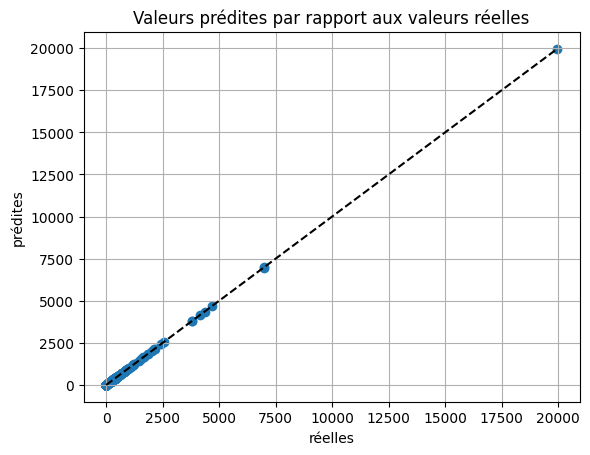

In [31]:
# Tracez les valeurs prédites par rapport aux valeurs réelles à l'aide de notre jeu de données de test

fig, ax = plt.subplots()
ax.scatter(y_test, pred)
min_value = min(min(y_test), min(pred))
max_value = max(max(y_test), max(pred))
ax.plot([min_value, max_value], [min_value, max_value], 'k--')
ax.grid(True)
ax.set_xlabel('réelles')
ax.set_ylabel('prédites')
ax.set_title('Valeurs prédites par rapport aux valeurs réelles')
plt.show()

# Probléme de Clustering : Clustering Travel Agency Booking Data

In [33]:
import pandas as pd
import numpy as np
import statsmodels as sm
import pylab as pl
from scipy import stats
from six import StringIO
from sklearn import preprocessing
from sklearn import cluster, tree, decomposition
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

In [34]:
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/travel.csv"
travel = pd.read_csv(file_name)

In [35]:
travel.head(5)

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,0,1,8286,1,0,1,0,63,1258,68
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,0,1,1842,3,0,1,2,198,786,37
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,0,1,8746,1,0,1,6,105,29,22
3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,...,0,1,6210,3,1,1,2,198,1234,42
4,4878884,2014-06-10 13:34:56,2,3,66,174,50644,NaN,596177,0,...,1,1,12812,5,0,1,2,50,368,83


# Decription de données
![alt text](https://miro.medium.com/max/704/1*qx6uN9Zr1Y2BVtm_yCAv5Q.png)

In [36]:
# Afficher le nombre de colonnes du dataframe

print(f"Nombre de colonnes : {travel.shape[1]}\n")

# Afficher le nombre de lignes du dataframe

print(f"Nombre de lignes : {travel.shape[0]}\n")

# Afficher toutes les colonnes 'Les Features'

print(f"Features : {travel.columns.to_list()}\n")

# Afficher le nombre des valeurs manquantes 

print(f"Nombre des valeurs manquantes : {travel.isna().sum().sum()}")

Nombre de colonnes : 25

Nombre de lignes : 100000

Features : ['Unnamed: 0', 'date_time', 'site_name', 'posa_continent', 'user_location_country', 'user_location_region', 'user_location_city', 'orig_destination_distance', 'user_id', 'is_mobile', 'is_package', 'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster']

Nombre des valeurs manquantes : 36329


In [37]:
# Obtenez des statistiques pour nos colonnes numériques par la fonction .describe() 

travel.describe()

,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,63915.000000,1.000000e+05,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.882530e+07,9.838570,2.678150,85.995070,308.636990,27676.391240,1960.661721,6.054383e+05,0.133770,0.248140,...,0.336750,1.111750,14426.32738,2.577290,0.079930,1.487980,3.150920,81.093290,598.848330,49.860370
std,1.086183e+07,11.996426,0.749018,59.292002,208.706581,16768.647409,2228.153377,3.516154e+05,0.340407,0.431936,...,0.734449,0.451602,11036.98122,2.149263,0.271186,1.280262,1.620534,56.111519,510.959297,28.885423
min,1.012000e+03,2.000000,0.000000,0.000000,0.000000,0.000000,0.005600,1.400000e+01,0.000000,0.000000,...,0.000000,0.000000,4.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.448967e+06,2.000000,3.000000,66.000000,174.000000,12949.000000,312.792100,2.987962e+05,0.000000,0.000000,...,0.000000,1.000000,8267.00000,1.000000,0.000000,1.000000,2.000000,50.000000,158.000000,25.000000
50%,1.881212e+07,2.000000,3.000000,66.000000,314.000000,27655.000000,1131.835300,6.028825e+05,0.000000,0.000000,...,0.000000,1.000000,9145.00000,1.000000,0.000000,1.000000,2.000000,50.000000,591.000000,49.000000
75%,2.825307e+07,15.000000,3.000000,70.000000,385.000000,42328.000000,2542.359350,9.157222e+05,0.000000,0.000000,...,0.000000,1.000000,18784.00000,5.000000,0.000000,2.000000,4.000000,106.000000,701.000000,73.000000
max,3.767009e+07,53.000000,4.000000,239.000000,1025.000000,56507.000000,11965.376100,1.198783e+06,1.000000,1.000000,...,9.000000,8.000000,65035.00000,9.000000,1.000000,120.000000,6.000000,212.000000,2117.000000,99.000000


In [38]:
# Trouver où se trouvent les valeurs manquantes

travel.isna().sum()

Unnamed: 0                       0
date_time                        0
site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    36085
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_ci                        122
srch_co                        122
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
is_booking                       0
cnt                              0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
hotel_cluster                    0
dtype: int64

In [40]:
# Créez la matrice de corrélation

corr_mat = travel.corr()

<AxesSubplot:>

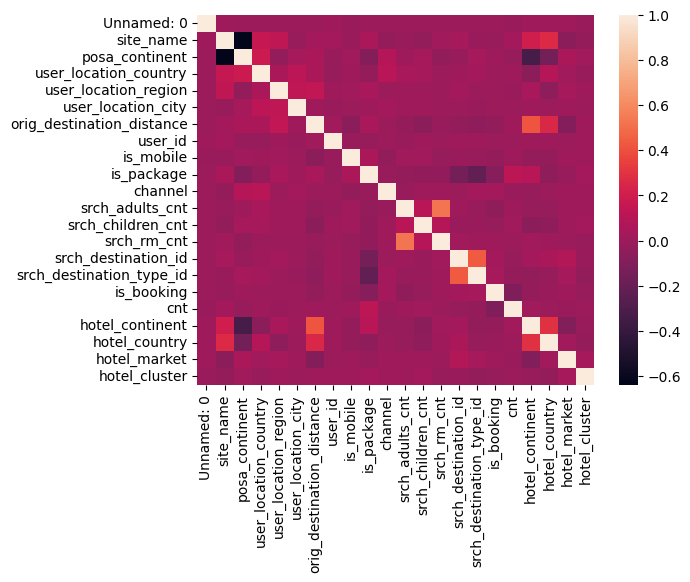

In [41]:
# Générer un graphique de corrélation ou une carte thermique
sns.heatmap(corr_mat)

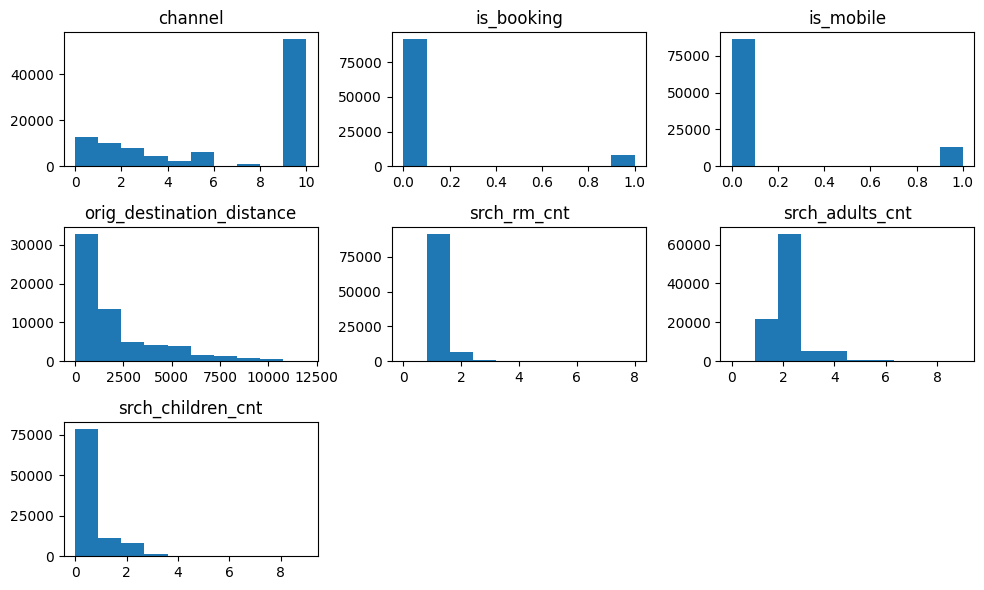

In [42]:
# Traçer les histoghrammes de 'channel', 'is_booking', 'is_mobile', 'orig_destination_distance', 'srch_rm_cnt', 'srch_adults_cnt' et 'srch_children_cnt' dans une seule instruction

travel.hist(column=['channel', 'is_booking', 'is_mobile', 'orig_destination_distance', 'srch_rm_cnt', 'srch_adults_cnt', 'srch_children_cnt'], bins=10, grid=False, figsize=(10, 6))

plt.xlabel('Valeurs')
plt.ylabel('Frequence')
plt.title('Histogramme')
plt.legend(['channel', 'is_booking', 'is_mobile', 'orig_destination_distance', 'srch_rm_cnt', 'srch_adults_cnt', 'srch_children_cnt'])

plt.tight_layout()
plt.show()

In [43]:
# Renommer la colonne 'Unnamed: 0' en 'user_id'

travel.drop("user_id", axis = 1, inplace = True)
travel.rename({"Unnamed: 0" : "user_id"}, axis = 1, inplace = True)

# Rajouter une colonne appelée level_0 comme index à notre base de données, utiliser la fonction .get_level_values(0)

travel["level_0"] = travel.index.get_level_values(0)
travel.set_index("level_0", inplace=True)
travel

,user_id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
level_0,,,,,,,,,,,,,,,,,,,,,
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,0,1,...,0,1,8286,1,0,1,0,63,1258,68
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,0,0,...,0,1,1842,3,0,1,2,198,786,37
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,0,1,...,0,1,8746,1,0,1,6,105,29,22
3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,0,0,...,0,1,6210,3,1,1,2,198,1234,42
4,4878884,2014-06-10 13:34:56,2,3,66,174,50644,NaN,0,0,...,1,1,12812,5,0,1,2,50,368,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,18926976,2013-03-31 16:45:01,2,3,66,351,21609,1386.4061,0,0,...,0,1,762,6,0,1,2,50,503,91
99996,2700011,2013-09-29 14:09:07,2,3,66,462,49272,698.1395,0,0,...,0,1,12843,5,0,1,2,50,661,6
99997,35620410,2014-07-11 22:05:54,37,1,69,998,52849,NaN,1,1,...,0,3,18773,1,0,1,6,22,1794,38


In [44]:
# Regrouper la répartition du nombre de tentatives de réservation
# utiliser la fonction .groupby pour les colonnes 'user_id' et 'is_booking', agrée par 'num_of_bookings':'count'

attemps = travel.groupby(['user_id', 'is_booking']).agg(num_of_bookings=('is_booking','count'))
attemps

,,num_of_bookings
user_id,is_booking,
1012,0,1
1014,0,1
1439,0,1
2680,1,1
3174,0,1
...,...,...
37669054,1,1
37669173,0,1
37670034,0,1


In [45]:
# Fusionnez le ( regrouper de la répartition du nombre de tentatives de réservation ) avec notre dataframe d'origine pour ajouter notre colonne 'count'

travel = travel.merge(attemps, on=['user_id', 'is_booking'], how='left')
travel

,user_id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,is_mobile,is_package,...,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,num_of_bookings
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,0,1,...,1,8286,1,0,1,0,63,1258,68,1
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,0,0,...,1,1842,3,0,1,2,198,786,37,1
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,0,1,...,1,8746,1,0,1,6,105,29,22,1
3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,0,0,...,1,6210,3,1,1,2,198,1234,42,1
4,4878884,2014-06-10 13:34:56,2,3,66,174,50644,NaN,0,0,...,1,12812,5,0,1,2,50,368,83,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,18926976,2013-03-31 16:45:01,2,3,66,351,21609,1386.4061,0,0,...,1,762,6,0,1,2,50,503,91,1
99996,2700011,2013-09-29 14:09:07,2,3,66,462,49272,698.1395,0,0,...,1,12843,5,0,1,2,50,661,6,1
99997,35620410,2014-07-11 22:05:54,37,1,69,998,52849,NaN,1,1,...,3,18773,1,0,1,6,22,1794,38,1
99998,25735008,2013-07-02 01:03:12,2,3,66,246,28491,207.2549,0,1,...,1,8859,1,0,1,2,50,212,89,1


# Faisons maintenant quelques vérifications logiques

In [46]:
# vérifier que Le nombre d'invités (nombre de voyageurs) est > 0

print(f"Nombre d'invités égale à 0 : {travel['cnt'].isnull().sum()}")

# Utiliser la fonction .crosstab pour regrouper les décomptes
travel_cross = pd.crosstab(travel['cnt'], travel['is_booking'])
travel_cross

Nombre d'invités égale à 0 : 0


is_booking,0,1
cnt,,
1,66564,7892
2,15070,89
3,5410,7
4,2232,1
5,1079,1
6,637,1
7,372,1
8,195,0
9,148,1


In [47]:
# Modifier le type des colonnes ('srch_co', 'srch_ci', 'date_time') en type datetime à l'aide de pandas

# Changez l'horodatage de 'date_time' (2014-11-03 16:02:28) en simplement "2014-11-03"

travel['srch_co'] = pd.to_datetime(travel['srch_co']).dt.date
travel['srch_ci'] = pd.to_datetime(travel['srch_ci']).dt.date
travel['date_time'] = pd.to_datetime(travel['date_time']).dt.date

In [48]:
# Vérifier que la date de départ est postérieure à la date d'arrivée 

print(f"Nombre de date de départ postérieure à la date d'arrivée : {travel[travel['srch_ci'] > travel['srch_co']].size}")

# Vérifier que la date d'arrivée est postérieure à la date de réservation

print(f"Nombre de date d'arrivée postérieure à la date de réservation : {travel[travel['date_time'] > travel['srch_ci']].size}")

travel.drop(travel[travel['date_time'] > travel['srch_ci']].index, axis = 0, inplace=True)
travel.drop(travel[travel['date_time'] > travel['srch_ci']].index, axis = 0, inplace=True)

Nombre de date de départ postérieure à la date d'arrivée : 50
Nombre de date d'arrivée postérieure à la date de réservation : 625


# Feature Engineering

In [49]:
# Créons de nouvelles colonnes qui peuvent fournir des informations utiles (pas toujours nécessaires mais utiles lors de la création de clusters/arbres de décision)
# Crée une premiére fonction appelée "duration" qui donne la durée du voyage en prenant la ligne comme entrée et en trouvant le temps (en jours) entre l'enregistrement et le départ

def duration(row):
    departure = row['srch_co']
    arrival = row['srch_ci']
    return (departure - arrival).days


# Crée une deuxiéme fonction appelée "days_in_advance" qui donne les jours où le voyage a été réservé à l'avance
def days_in_advance(row):
    reservation = row['date_time']
    arrival = row['srch_ci']
    return (arrival - reservation).days


# Conversion Datetime


travel['srch_ci'] = pd.to_datetime(travel['srch_ci'], errors='coerce')

travel['srch_co'] = pd.to_datetime(travel['srch_co'], errors='coerce')

travel['date_time'] = pd.to_datetime(travel['date_time'], errors='coerce')


# Rajouter une colonne appelée 'duration' contenant la durée correspond à la durée du séjour en soustrayant le jour de départ du jour d'arrivée

travel["duration"] = travel.apply(duration, axis = 1)

# Rajouter une colonne appelée ''days_in_advance'' qui indique combien de temps à l'avance la réservation a été effectuée. Fait en soustrayant la date d'arrivée de la date de réservation

travel["days_in_advance"] = travel.apply(days_in_advance, axis = 1)


In [50]:
# Afficher les 5 premiéres lignes pour vérifier la tronsformation sur notre dataframe
travel.head()

,user_id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,is_mobile,is_package,...,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,num_of_bookings,duration,days_in_advance
0,24636210,2014-11-03,24,2,77,871,36643,456.1151,0,1,...,1,0,1,0,63,1258,68,1,4.0,42.0
1,19837144,2013-03-13,11,3,205,135,38749,232.4737,0,0,...,3,0,1,2,198,786,37,1,1.0,0.0
2,13066459,2014-10-13,2,3,66,314,48562,4468.2720,0,1,...,1,0,1,6,105,29,22,1,7.0,172.0
3,4691082,2013-11-05,11,3,205,411,52752,171.6021,0,0,...,3,1,1,2,198,1234,42,1,1.0,2.0
4,4878884,2014-06-10,2,3,66,174,50644,NaN,0,0,...,5,0,1,2,50,368,83,1,5.0,54.0


### Analyse statistique des canaux de réservation

In [51]:
# Examinons les performances de chaque canal en consultant le taux de réservation pour chaque type de canal taux de réservation par canal
# Regroupper les 'channel' par 'is_booking' aggrée par {'booking_rate': 'mean', 'num_of_bookings': 'count'}

booking = travel.groupby('channel')['is_booking'].agg(booking_rate='mean', num_of_bookings='count')
booking

,booking_rate,num_of_bookings
channel,,
0,0.071959,12521
1,0.069613,10271
2,0.060521,7832
3,0.060427,4402
4,0.120784,2194
5,0.094349,6158
6,0.067901,162
7,0.043210,810
8,0.055351,271



# Commençons le clustering

## Étape 1 : Choisissons quelques fonctionnalités à l'aide de notre connaissance du domaine d'activité et explorons-les


In [78]:
# Créer une variable nommée 'features_to_explore' contenant les noms de nos colonnes

features_to_explore = ['channel', 'is_booking', 'is_mobile', 'orig_destination_distance']

# Créons deux nouveaux dataframes avec nos nouvelles données appelées city_data et un autre appelée city_groups où nous faisons un groupby sur city_data sur user_location_city

city_data = travel.groupby('srch_destination_id').mean().reset_index()
city_groups = travel.groupby('user_location_city').mean().reset_index()


In [79]:
# Afficher le nombre de lignes et de colonnes du dataframe 'city_groups'

print(f"Nombre de lignes : {city_groups.shape[0]}\n")
print(f"Nombre de colonnes : {city_groups.shape[1]}")

Nombre de lignes : 10778

Nombre de colonnes : 24


# Etape 2 : Standardiser nos données

In [80]:
# Appliquer un preprocessing.scale aux variables numériques

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = travel[features_to_explore].dropna().values

travel_scaled = scaler.fit_transform(travel[features_to_explore].dropna())

# Étape 3 : Implémenter le clustering via K-means

In [87]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

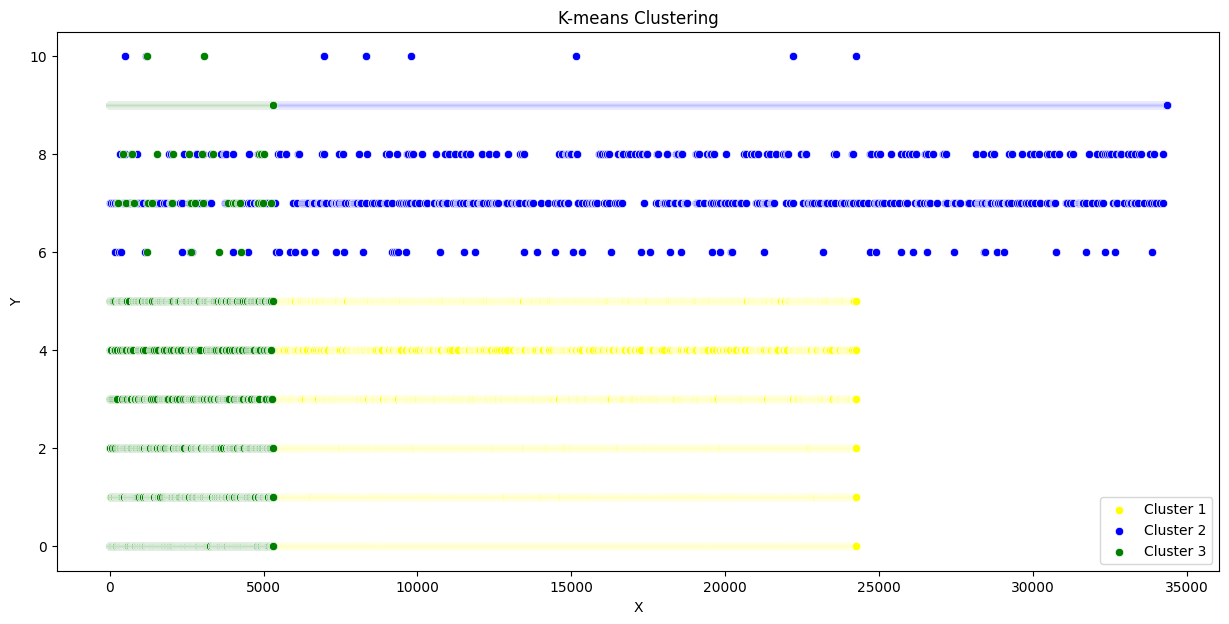

In [86]:
# Créer arbitrairement 3 clusters

kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(travel_scaled)
y_kmeans

# Crée un graph pour l'analyse en composantes principales pour la visualisation
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], color='yellow', label='Cluster 1')
sns.scatterplot(X[y_kmeans == 1, 0], color='blue', label='Cluster 2')
sns.scatterplot(X[y_kmeans == 2, 0], color='green', label='Cluster 3')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-means Clustering')
plt.show()

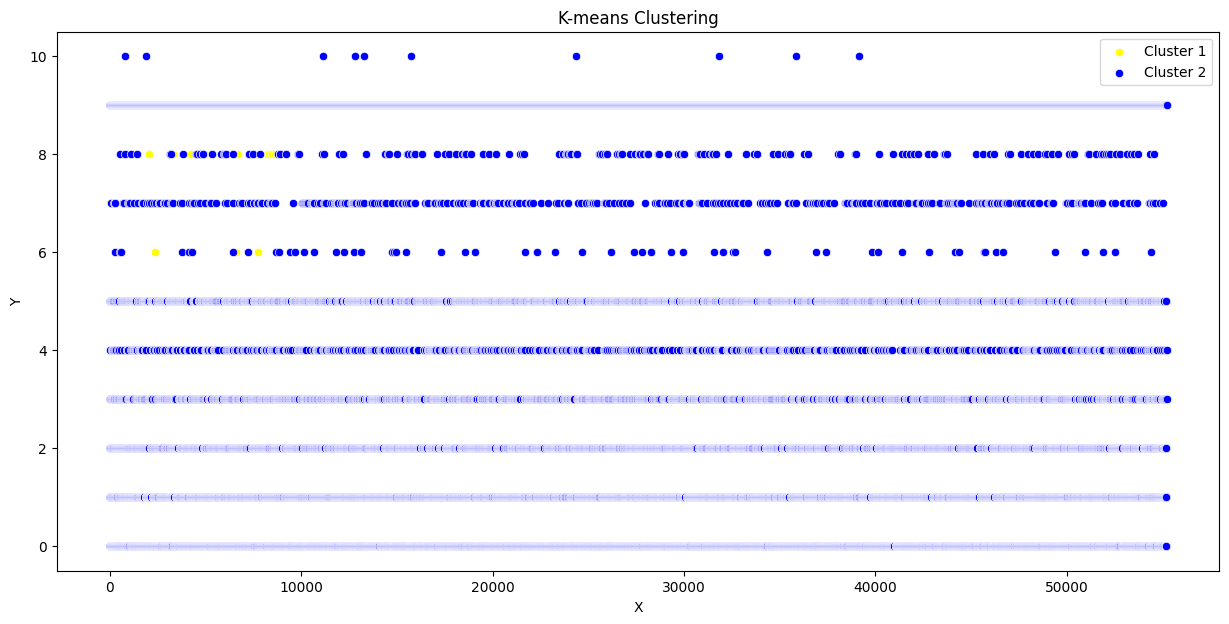

In [91]:
# Créer arbitrairement 2 clusters
kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(travel_scaled)
y_kmeans

# Crée un graph pour l'analyse en composantes principales pour la visualisation
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], color='yellow', label='Cluster 1')
sns.scatterplot(X[y_kmeans == 1, 0], color='blue', label='Cluster 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-means Clustering')
plt.show()


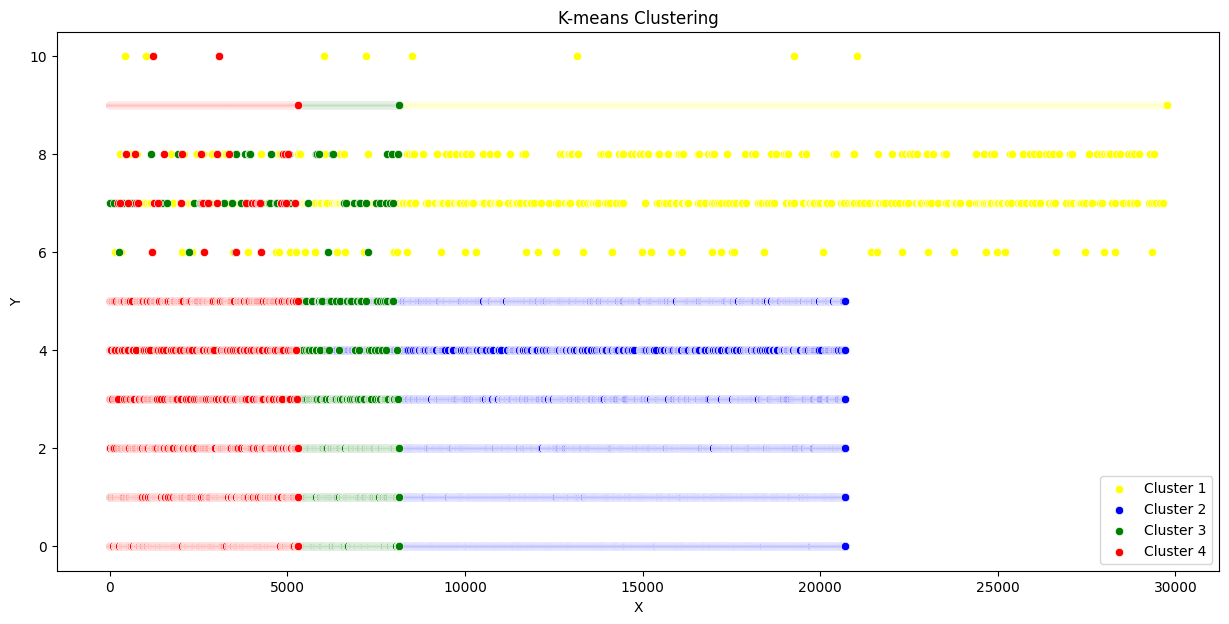

In [92]:
# Créer arbitrairement 4 clusters
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(travel_scaled)
y_kmeans

# Crée un graph pour l'analyse en composantes principales pour la visualisation
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], color='yellow', label='Cluster 1')
sns.scatterplot(X[y_kmeans == 1, 0], color='blue', label='Cluster 2')
sns.scatterplot(X[y_kmeans == 2, 0], color='green', label='Cluster 3')
sns.scatterplot(X[y_kmeans == 3, 0], color='red', label='Cluster 4')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-means Clustering')
plt.show()

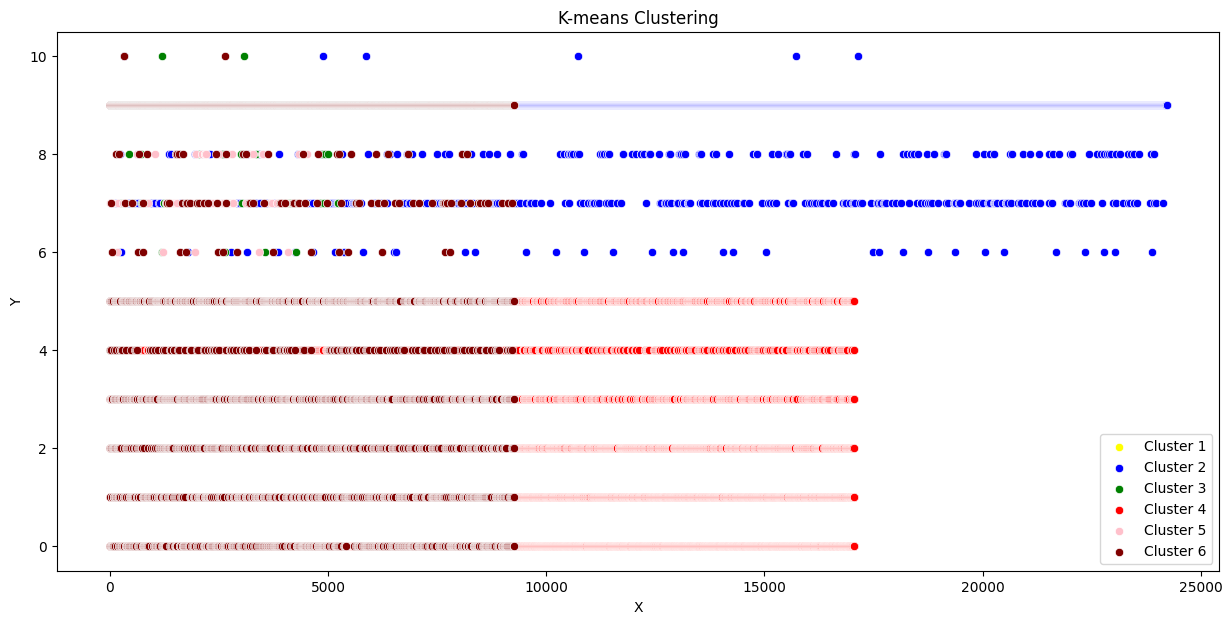

In [93]:
# Créer arbitrairement 6 clusters
kmeans = KMeans(n_clusters=6)
y_kmeans = kmeans.fit_predict(travel_scaled)
y_kmeans

# Crée un graph pour l'analyse en composantes principales pour la visualisation
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], color='yellow', label='Cluster 1')
sns.scatterplot(X[y_kmeans == 1, 0], color='blue', label='Cluster 2')
sns.scatterplot(X[y_kmeans == 2, 0], color='green', label='Cluster 3')
sns.scatterplot(X[y_kmeans == 3, 0], color='red', label='Cluster 4')
sns.scatterplot(X[y_kmeans == 4, 0], color='pink', label='Cluster 5')
sns.scatterplot(X[y_kmeans == 5, 0], color='maroon', label='Cluster 6')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-means Clustering')
plt.show()